# Santa Visiting Homes in Strathcona County

We have a data set from [Strathcona County's Open Data Portal](https://data.strathcona.ca/) that includes all of the homes in the county.

Your task is to help Santa visit these homes on Christmas Eve in the most efficient manner possible.

## Importing Code
First we'll import some Python libraries that we'll use. These libraries are code that other people have written to help make our programming easier.

In [41]:
# Start by importing modules
# We will store the data into a 'dataframe' using pandas
import pandas as pd
# We want to be as precise as possible in keeping tree coordinates
#from decimal import *
# We will visualize the coordinates in a map using the folium 
import folium
# We want to cluster them using the FastMarkerCluster submodule from folium plugins
from folium.plugins import FastMarkerCluster
# The geopy library will help us calculate distances on a map
from geopy import distance
# We'll use some matplotlib as well
import matplotlib.pyplot as plt
%matplotlib inline

print('Successfully imported Python libraries')

Successfully imported Python libraries


## Getting Data About Homes

Next we will get the data from the open data portal and have a look at the first five rows using `.head()`.

In [19]:
data_url = 'https://data.strathcona.ca/api/views/c9fr-ivqf/rows.csv?accessType=DOWNLOAD'
home_data = pd.read_csv(data_url)
home_data.head()

,the_geom,TAX_YEAR,ROLL_NUM,ADDRESS,YEAR_BUILT,ASSESSCLAS,BLDG_DESC,BLDG_METRE,BLDG_FEET,GARAGE,FIREPLACE,BASEMENT,BSMTDEVL,ASSESSMENT,LATITUDE,LONGITUDE,Neighbourhoods,Ward_from_53vs_nysp,Ward Boundary_from_xwum_z2bu
0,POINT (-113.30243151136236 53.529255010406125),2018,7520553004,"47, 2131 OAK ST",1983.0,Exempt,2 Storey & Basement,109,1170,N,N,Y,N,233000,53.530245,-113.302167,124.0,1,1
1,POINT (-113.26140189927364 53.523991245712466),2018,7251135003,557 FORREST DR,2003.0,Residential,1 Storey & Basement,143,1538,Y,Y,Y,Y,516000,53.523805,-113.261276,257.0,4,4
2,POINT (-113.2889926581311 53.38482043135446),2018,1311700007,NaN,1960.0,Exempt / Farmland / Residential,1 Storey & Basement,125,1345,Y,Y,Y,Y,400230,53.388431,-113.295048,NaN,8,7
3,POINT (-113.27484287251478 53.52589053315396),2018,7207002002,39 GREENRIDGE DR,1985.0,Residential,2 Storey & Basement,176,1899,Y,Y,Y,Y,434000,53.526015,-113.275070,228.0,7,6
4,POINT (-113.28827567138487 53.5272820077841),2018,7065021003,41 PEACOCK DR,1969.0,Residential,1 Storey & Basement,104,1119,Y,Y,Y,Y,337000,53.527206,-113.288567,242.0,7,6


## Visualizing Home Locations

Let's use folium to plot the home locations on an interactive map.

In [3]:
m = folium.Map(location=[53.5701, -113.0741], zoom_start=10)
m.add_child(FastMarkerCluster(home_data[['LATITUDE', 'LONGITUDE']].values.tolist()))

display(m)

## Counting Homes

That's a lot of homes for Santa to visit, and this is just in Strathcona County. To find out how many homes are in the data set we can use `.shape`.

In [107]:
home_data.shape

(34454, 19)

## Calculating Travel Time

We can approximate Santa's travel time using the equation $t = \frac{d}{v}$ where $t$ is time, $d$ is distance, and $v$ is speed or velocity.

Start by assuming that Santa can travel close to the speed of sound, or about 300 meters per second, and that he spends about 30 seconds in each home.

In [108]:
# Function with Santa's speed and time per home to calculate time required
# Feel free to change the values for flight_speed and time_per_home and re-run this cell
def calculate_required_time(travel_distance, number_of_homes):
    flight_speed = 300
    time_per_home = 30
    time_required = travel_distance / flight_speed + time_per_home
    return time_required
print('We have defined the function calculate_required_time.')

We have defined the function calculate_required_time.


In [109]:
number_of_homes = home_data.shape[0]
total_distance = 0
previous_location = (53.5701, -113.0741) # starting from the middle of Strathcona County
for record in home_data.iterrows():
    current_location = (record[1]['LATITUDE'], record[1]['LONGITUDE'])
    travel_distance = distance.distance(previous_location, current_location).meters
    total_distance = total_distance + travel_distance
    previous_location = current_location

print(total_distance, 'meters')
required_time = calculate_required_time(total_distance, number_of_homes)
print(required_time, 'seconds required.')
print(required_time/3600, 'hours required')

182305685.19148567 meters
607715.6173049522 seconds required.
168.80989369582005 hours required


That seems like a long time, a little over a week. You can of course change the values in the calculate_required_time function so Santa travels faster or spends less time in each home.



# Visualizing Path

A better way to decrease the travel time, though, would be to visit homes in an optimal order. Right now we just have Santa visiting homes in the order they are listed in the data:

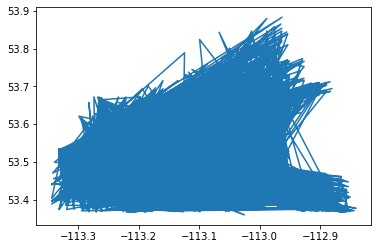

In [42]:
plt.plot(home_data['LONGITUDE'], home_data['LATITUDE'])

Looking at just the first 25 homes, we can see that this is not an efficient path:

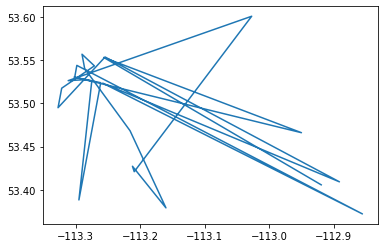

In [66]:
plt.plot(home_data[0:25]['LONGITUDE'], home_data[0:25]['LATITUDE'])

# Travelling Salesman Problem

Optimizing Santa's travel path is a version of the classic [travelling salesman problem](https://simple.wikipedia.org/wiki/Travelling_salesman_problem), which is actually a very hard mathematical problem to compute.

There hasn't yet been a good solution, and there is a [$1,000,000 prize](http://www.claymath.org/millennium-problems/p-vs-np-problem) available to anyone who solves it.

## Filtering and Sorting Data

Assuming that you haven't solved the travelling salesman problem already, we'll try to optimize Santa's route by eliminating some homes. Let's see what data categories are available:

In [68]:
home_data.columns

Index(['the_geom', 'TAX_YEAR', 'ROLL_NUM', 'ADDRESS', 'YEAR_BUILT',
       'ASSESSCLAS', 'BLDG_DESC', 'BLDG_METRE', 'BLDG_FEET', 'GARAGE',
       'FIREPLACE', 'BASEMENT', 'BSMTDEVL', 'ASSESSMENT', 'LATITUDE',
       'LONGITUDE', 'Neighbourhoods', 'Ward_from_53vs_nysp',
       'Ward Boundary_from_xwum_z2bu'],
      dtype='object')

There are a couple of column names that are interesting for our purposes: `'ASSESSCLAS'` and perhaps `'FIREPLACE'`. Let's look at the types of "assessment classes":

In [67]:
for assessment_class in home_data['ASSESSCLAS'].unique():
    print(assessment_class)

Exempt
Residential
Exempt / Farmland / Residential
Residential Condominium
Vacant Residential
Farmland / Residential
Exempt / Residential
Exempt / Farmland / Non-Residential / Residential
Non-Residential / Residential
Farmland / Non-Residential / Residential
Exempt / Non-Residential / Residential
Exempt / Farmland / Residential / Vacant Non-Resi
Farmland
Exempt / Farmland / Residential Condominium
Apartment/Townhouse
Farmland / Non-Residential / Residential / Tax Ex
Vacant Non-Residential
Farmland / Non-Residential
Farmland / Residential / Tax Exempt Farm Residenc
Farmland / Residential / Tax Exempt Farm Building
Residential / Tax Exempt Farm Residence
Non-Residential
Residential / Vacant Residential
Manufactured Home Park/Home


To get just the homes that are `'Residential'`:

In [70]:
condition = home_data['ASSESSCLAS']=='Residential'
home_data_filtered = home_data[condition]
home_data_filtered.shape

(28450, 19)

Or how about just the homes with fireplaces, try:

`condition = home_data['FIREPLACE']=='Y'`

You can also specify two conditions like this:

---

`condition1 = home_data['ASSESSCLAS'] == 'Residential'`

`condition2 = home_data['YEAR_BUILT'] < 2000`

`home_data_filtered = home_data[(condition1) & (condition2)]`

---

`&` means **and**

`|` means **or**

Ordering the data by latitude might also help:

`home_data_sorted = home_data_filtered.sort_values(by=['LONGITUDE'])`

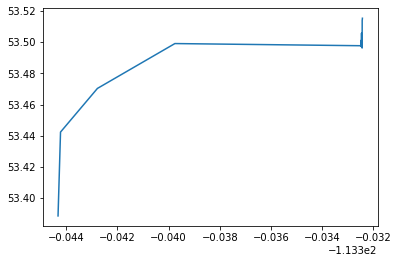

In [93]:
home_data_sorted = home_data_filtered.sort_values(by=['LONGITUDE'])
plt.plot(home_data_sorted[0:25]['LONGITUDE'], home_data_sorted[0:25]['LATITUDE'])

## Calculating Total Time From a Dataframe

To make things easier, let's define a function that calculates Santa's total time using data in a dataframe.

After running this cell, we'll be able to see Santa's total time by just calling this function with one of your dataframes like this:

`calculate_time_from_dataframe(home_data_sorted)`

In [103]:
# Function with Santa's speed and "time per home" to calculate total time required
def calculate_time_from_dataframe(df):
    flight_speed = 300  # in m/s, the speed of sound = 331 + 0.6*T where T is temperature is Celsius
    time_per_home = 30  # in seconds
    number_of_homes = df.shape[0]
    total_distance = 0
    previous_location = (53.5701, -113.0741) # the middle of Strathcona County
    for row in df.iterrows():
        current_location = (row[1]['LATITUDE'], row[1]['LONGITUDE'])
        travel_distance = distance.distance(previous_location, current_location).meters
        total_distance = total_distance + travel_distance
        previous_location = current_location
    time_required = total_distance / flight_speed + time_per_home
    print(total_distance, 'meters')
    print(time_required, 'seconds')
    print(time_required/3600, 'hours')
    return time_required
print('We have defined the function calculate_time_from_dataframe.')

We have defined the function calculate_time_from_dataframe.


## Analysis

Try out different filtering and sorting ideas to see how best to minimize the time that Santa takes to visit homes in Strathcona County.

# Conclusions

In this cell describe how you would **minimize Santa's travel time**. Include any data filtering and sorting steps that you recommend, and why you would recommend them.

## Reflections

Write about some or all of the following questions, either individually in separate markdown cells or as a group.
- What is something you learned through this process?
- How well did your group work together? Why do you think that is?
- What were some of the hardest parts?
- What are you proud of? What would you like to show others?
- Are you curious about anything else related to this? Did anything surprise you?
- How can you apply your learning to future activities?